In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
dataframe = pd.read_csv('Social_Network_Ads.csv')
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [143]:
dataframe = dataframe.iloc[:,2:]
dataframe.sample(5)

,Age,EstimatedSalary,Purchased
327,42,75000,0
141,18,68000,0
350,38,113000,1
389,48,35000,1
229,42,80000,1


Train-Test Split

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dataframe.drop('Purchased',axis=1),dataframe['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
scaler.mean_ # mu of age and salary

array([3.78642857e+01, 6.98071429e+04])

In [147]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [148]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [149]:
np.round(X_train_scaled.describe()),1

(         Age  EstimatedSalary
 count  280.0            280.0
 mean     0.0              0.0
 std      1.0              1.0
 min     -2.0             -2.0
 25%     -1.0             -1.0
 50%     -0.0              0.0
 75%      1.0              1.0
 max      2.0              2.0,
 1)

<function matplotlib.pyplot.show(close=None, block=None)>

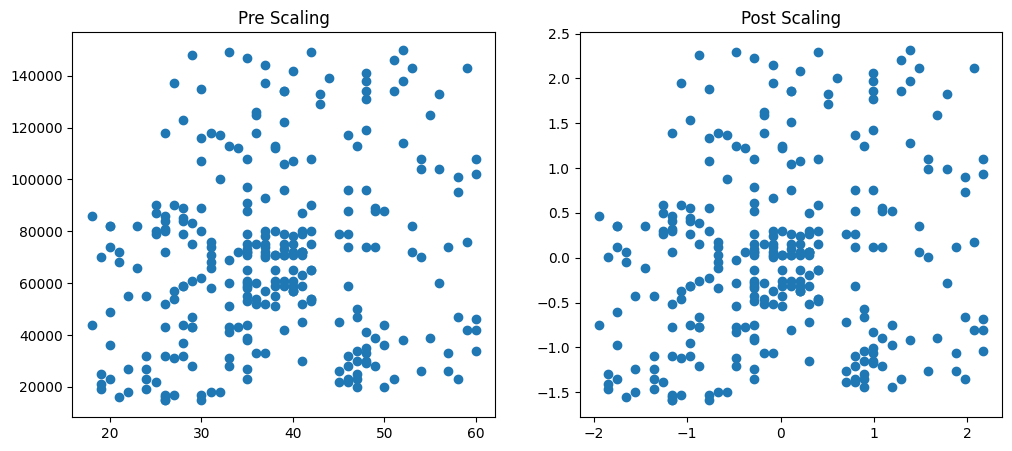

In [150]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Pre Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title("Post Scaling")
plt.show

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

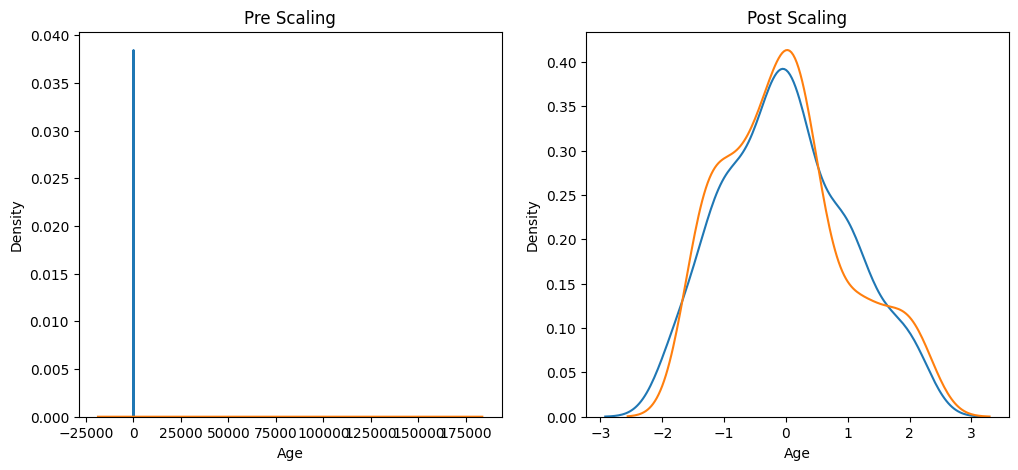

In [151]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Pre Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax2.set_title("Post Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


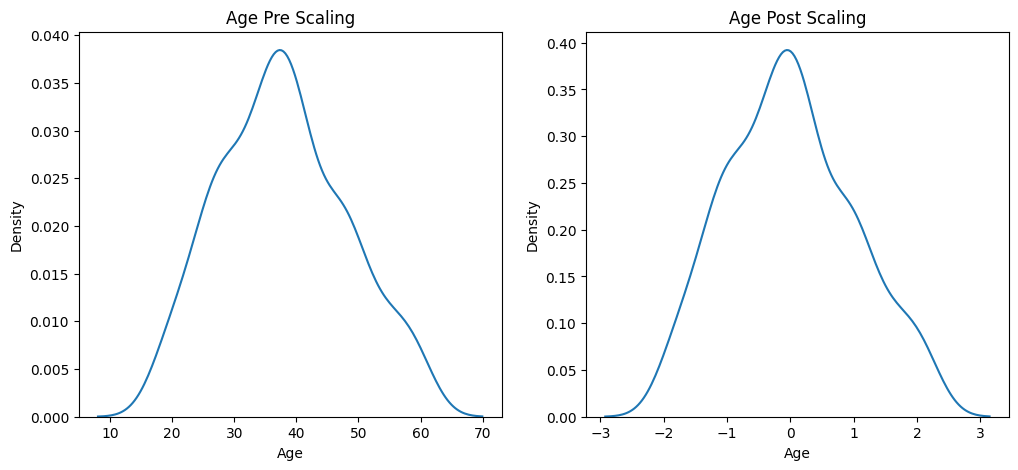

In [152]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Age Pre Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("Age Post Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


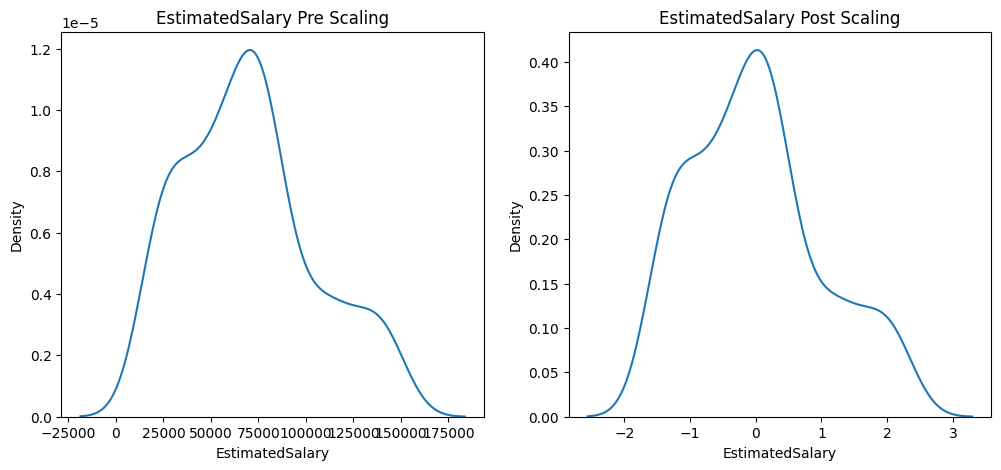

In [153]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("EstimatedSalary Pre Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("EstimatedSalary Post Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

Using Logistic Regression to show why scaling is useful

In [154]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [155]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [156]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [157]:
from sklearn.metrics import accuracy_score

print("Actual: ",accuracy_score(Y_test,y_pred))
print("Scaled: ",accuracy_score(Y_test,y_pred_scaled))

Actual:  0.875
Scaled:  0.8666666666666667


In [158]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [159]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [160]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [161]:
print("Actual: ",accuracy_score(Y_test,y_pred))
print("Scaled: ",accuracy_score(Y_test,y_pred_scaled))

Actual:  0.875
Scaled:  0.875


In [162]:
dataframe.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Algos to use Standardization/Scaling with
1. K-means
2. KNN
3. PCA
4. ANN
5. Gradient Descent